# <center>Setup LandBOSSE</center>

In [17]:
import os
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import pandas as pd

# Path to save plots and other data:
path = '/Users/pbhaskar/Desktop/cowe2022/lbw/'

from landbosse.excelio import XlsxSerialManagerRunner
from landbosse.excelio import XlsxParallelManagerRunner
from landbosse.excelio import XlsxGenerator
from landbosse.excelio import XlsxValidator
from landbosse.excelio import CsvGenerator

# When not running Binder and you want to provide your own input data, set_path to False:
set_path = True

# When running Binder set to True
running_binder = False

# LandBOSSE, small utility functions
from landbosse.excelio import XlsxFileOperations
if running_binder == True:
    binder_dir = os.path.join(os.getcwd(), 'jovyan')
    input_output_path = os.path.dirname(binder_dir)
else: 
    if set_path:
        input_output_path = '~/Desktop/'
    else:
        input_output_path = os.path.dirname(os.path.join(os.getcwd(), 'input'))

os.environ["LANDBOSSE_INPUT_DIR"] = input_output_path

<br/><br/>
# <center>Run LandBOSSE</center>

In [18]:
if __name__ == '__main__':
    # Print start timestamp
    print(f'>>>>>>>> Begin run {datetime.now()} <<<<<<<<<<')

    # The file_ops object handles file names for input and output data.
    file_ops = XlsxFileOperations()

    run_parallel = False
    manager_runner = XlsxParallelManagerRunner(file_ops) if run_parallel else XlsxSerialManagerRunner(file_ops)

    # project_xlsx is the absolute path of the project_list.xlsx
    projects_xlsx = os.path.join(file_ops.landbosse_input_dir(), 'project_list.xlsx')

    validation_enabled = False
    
    # final_result aggregates all the results from all the projects.
    final_result = manager_runner.run_from_project_list_xlsx(projects_xlsx, validation_enabled)
    print(final_result)
    print('Simulation Successful!')
#     print('Results: ')
#     print('')

>>>>>>>> Begin run 2022-09-09 11:28:53.993371 <<<<<<<<<<

>>> project_id: ge15_dist_165
>>> Project data: ~/Desktop/project_data/ge15_public.xlsx

{'F_dead_kN_per_turbine': 1798.08695652174, 'F_horiz_kN_per_turbine': 624.8822519784526, 'M_tot_kN_m_per_turbine': 47120.0, 'Radius_o_m': 7.365382452356683, 'Radius_s_m': 1.1917109249299527, 'Radius_g_m': 0, 'Radius_b_m': 7.164040491294037, 'Radius_m': 7.365382452356683, 'excavated_volume_m3': 458.6712992107442, 'foundation_volume_concrete_m3_per_turbine': 180.9943404451053, 'material_needs_per_turbine':     Material type ID  Quantity of material        Units
0      Steel - rebar             20.611635  ton (short)
1  Concrete 5000 psi            233.180574  cubic yards
2     Excavated dirt            599.919126  cubic_yards
3           Backfill            599.919126  cubic_yards, 'steel_mass_short_ton_per_turbine': 20.611635489888595, 'material_needs_entire_farm':     Material type ID  Quantity of material        Units
0      Steel - rebar  

<br/><br/>
# <center>Collect BOS CapEx Results</center>

In [19]:
    # print(final_result)
    total_collection_cost = final_result['jp_collectioncost_total']
    total_development_cost = final_result['jp_developmentcost_total']
    total_erection_cost = final_result['jp_erectioncost_total']
    total_foundation_cost = final_result['jp_foundationcost_total']
    total_gridconnection_cost = final_result['jp_gridconnectioncost_total']
    total_management_cost = final_result['total_management_cost']
    total_sitepreparation_cost = final_result['jp_sitepreperationcost_total']
    total_substation_cost = final_result['jp_substationcost_total']

    total_bos_cost = \
        total_collection_cost + \
        total_development_cost + \
        total_erection_cost + \
        total_foundation_cost + \
        total_gridconnection_cost + \
        total_management_cost + \
        total_sitepreparation_cost + \
        total_substation_cost
    
    plant_capacity_kW = final_result['plant_capacity_MW'] * 1000
        
    total_bos_cost_kW = total_bos_cost / plant_capacity_kW
    
    print('Plant Size MW: ', final_result['plant_capacity_MW'])
    
    print('Collection Cost ($/kW): ', round(total_collection_cost / plant_capacity_kW))
    print('Development Cost ($/kW): ', round(total_development_cost / plant_capacity_kW))
    print('Erection Cost ($/kW): ', round(total_erection_cost / plant_capacity_kW))
    print('Foundation Cost ($/kW): ', round(total_foundation_cost / plant_capacity_kW))
    print('Grid Connection Cost ($/kW): ', round(total_gridconnection_cost / plant_capacity_kW))
    print('Management Cost ($/kW): ', round(total_management_cost / plant_capacity_kW))
    print('Site Preparation Cost ($/kW): ', round(total_sitepreparation_cost / plant_capacity_kW))
    print('Substation Cost ($/kW): ', round(total_substation_cost / plant_capacity_kW))
    print('')
   
    

Plant Size MW:  150.0
Collection Cost ($/kW):  46
Development Cost ($/kW):  1
Erection Cost ($/kW):  40
Foundation Cost ($/kW):  68
Grid Connection Cost ($/kW):  0
Management Cost ($/kW):  10
Site Preparation Cost ($/kW):  11
Substation Cost ($/kW):  23



<br/><br/>
# <center>Collect Financial CapEx Results</center>

In [20]:
    ## Financial CapEx breakdown: 
    financial_costs_kW = 125 
    construction_financing_cost = 34
    contingency_fund = 88

<br/><br/>
# <center>Collect Turbine CapEx Results</center>

In [21]:
    ## Turbine CapEx breakdown: 
    turbine_capex_kW = 1021
    
    # Rotor cost and breakdown:
    rotor_cost = 311
    pitch_assembly = 201
    hub_assembly = 47
    
    # Nacelle cost and breakdown: 
    nacelle_module = 508
    nacelle_structural_assembly = 102
    drivetrain_assembly = 203
    nacelle_electrical_assembly = 164
    yaw_assembly = 38
    
    # Tower cost
    tower_module = 203
    
    print('Total BOS CapEx ($/kW): ', round(total_bos_cost_kW))
    print('Financial Costs ($/kW): ', financial_costs_kW)    
    print('Turbine CapEx ($/kW): ', turbine_capex_kW)
    print('Total Project CapEx ($/kW): ', round(total_bos_cost_kW + financial_costs_kW + turbine_capex_kW))

Total BOS CapEx ($/kW):  200
Financial Costs ($/kW):  125
Turbine CapEx ($/kW):  1021
Total Project CapEx ($/kW):  1346


<br/><br/>
# <center>Collect OpEx, FCR, Net AEP, LCOE, and CF Costs</center>

In [22]:
opex_usd_kw_yr = 43    # User Input - Cost obtained from LBNL Market Report from LBW (could be replaced w/ WOMBAT in the future)
fcr = 5.78    # User Input - Obtained from LBNL 
net_aep = 3703    # From SAM (losses = 16.1% - Availability Losses)
net_cf = 42.3    # From SAM (losses = 16.1% - Availability Losses)
lcoe = 34    # From SAM (losses = 16.1% - Availability Losses)

<br/><br/>
# <center>Figure ES1. Donut Plot - CapEx for the land-based reference wind power plant project</center>

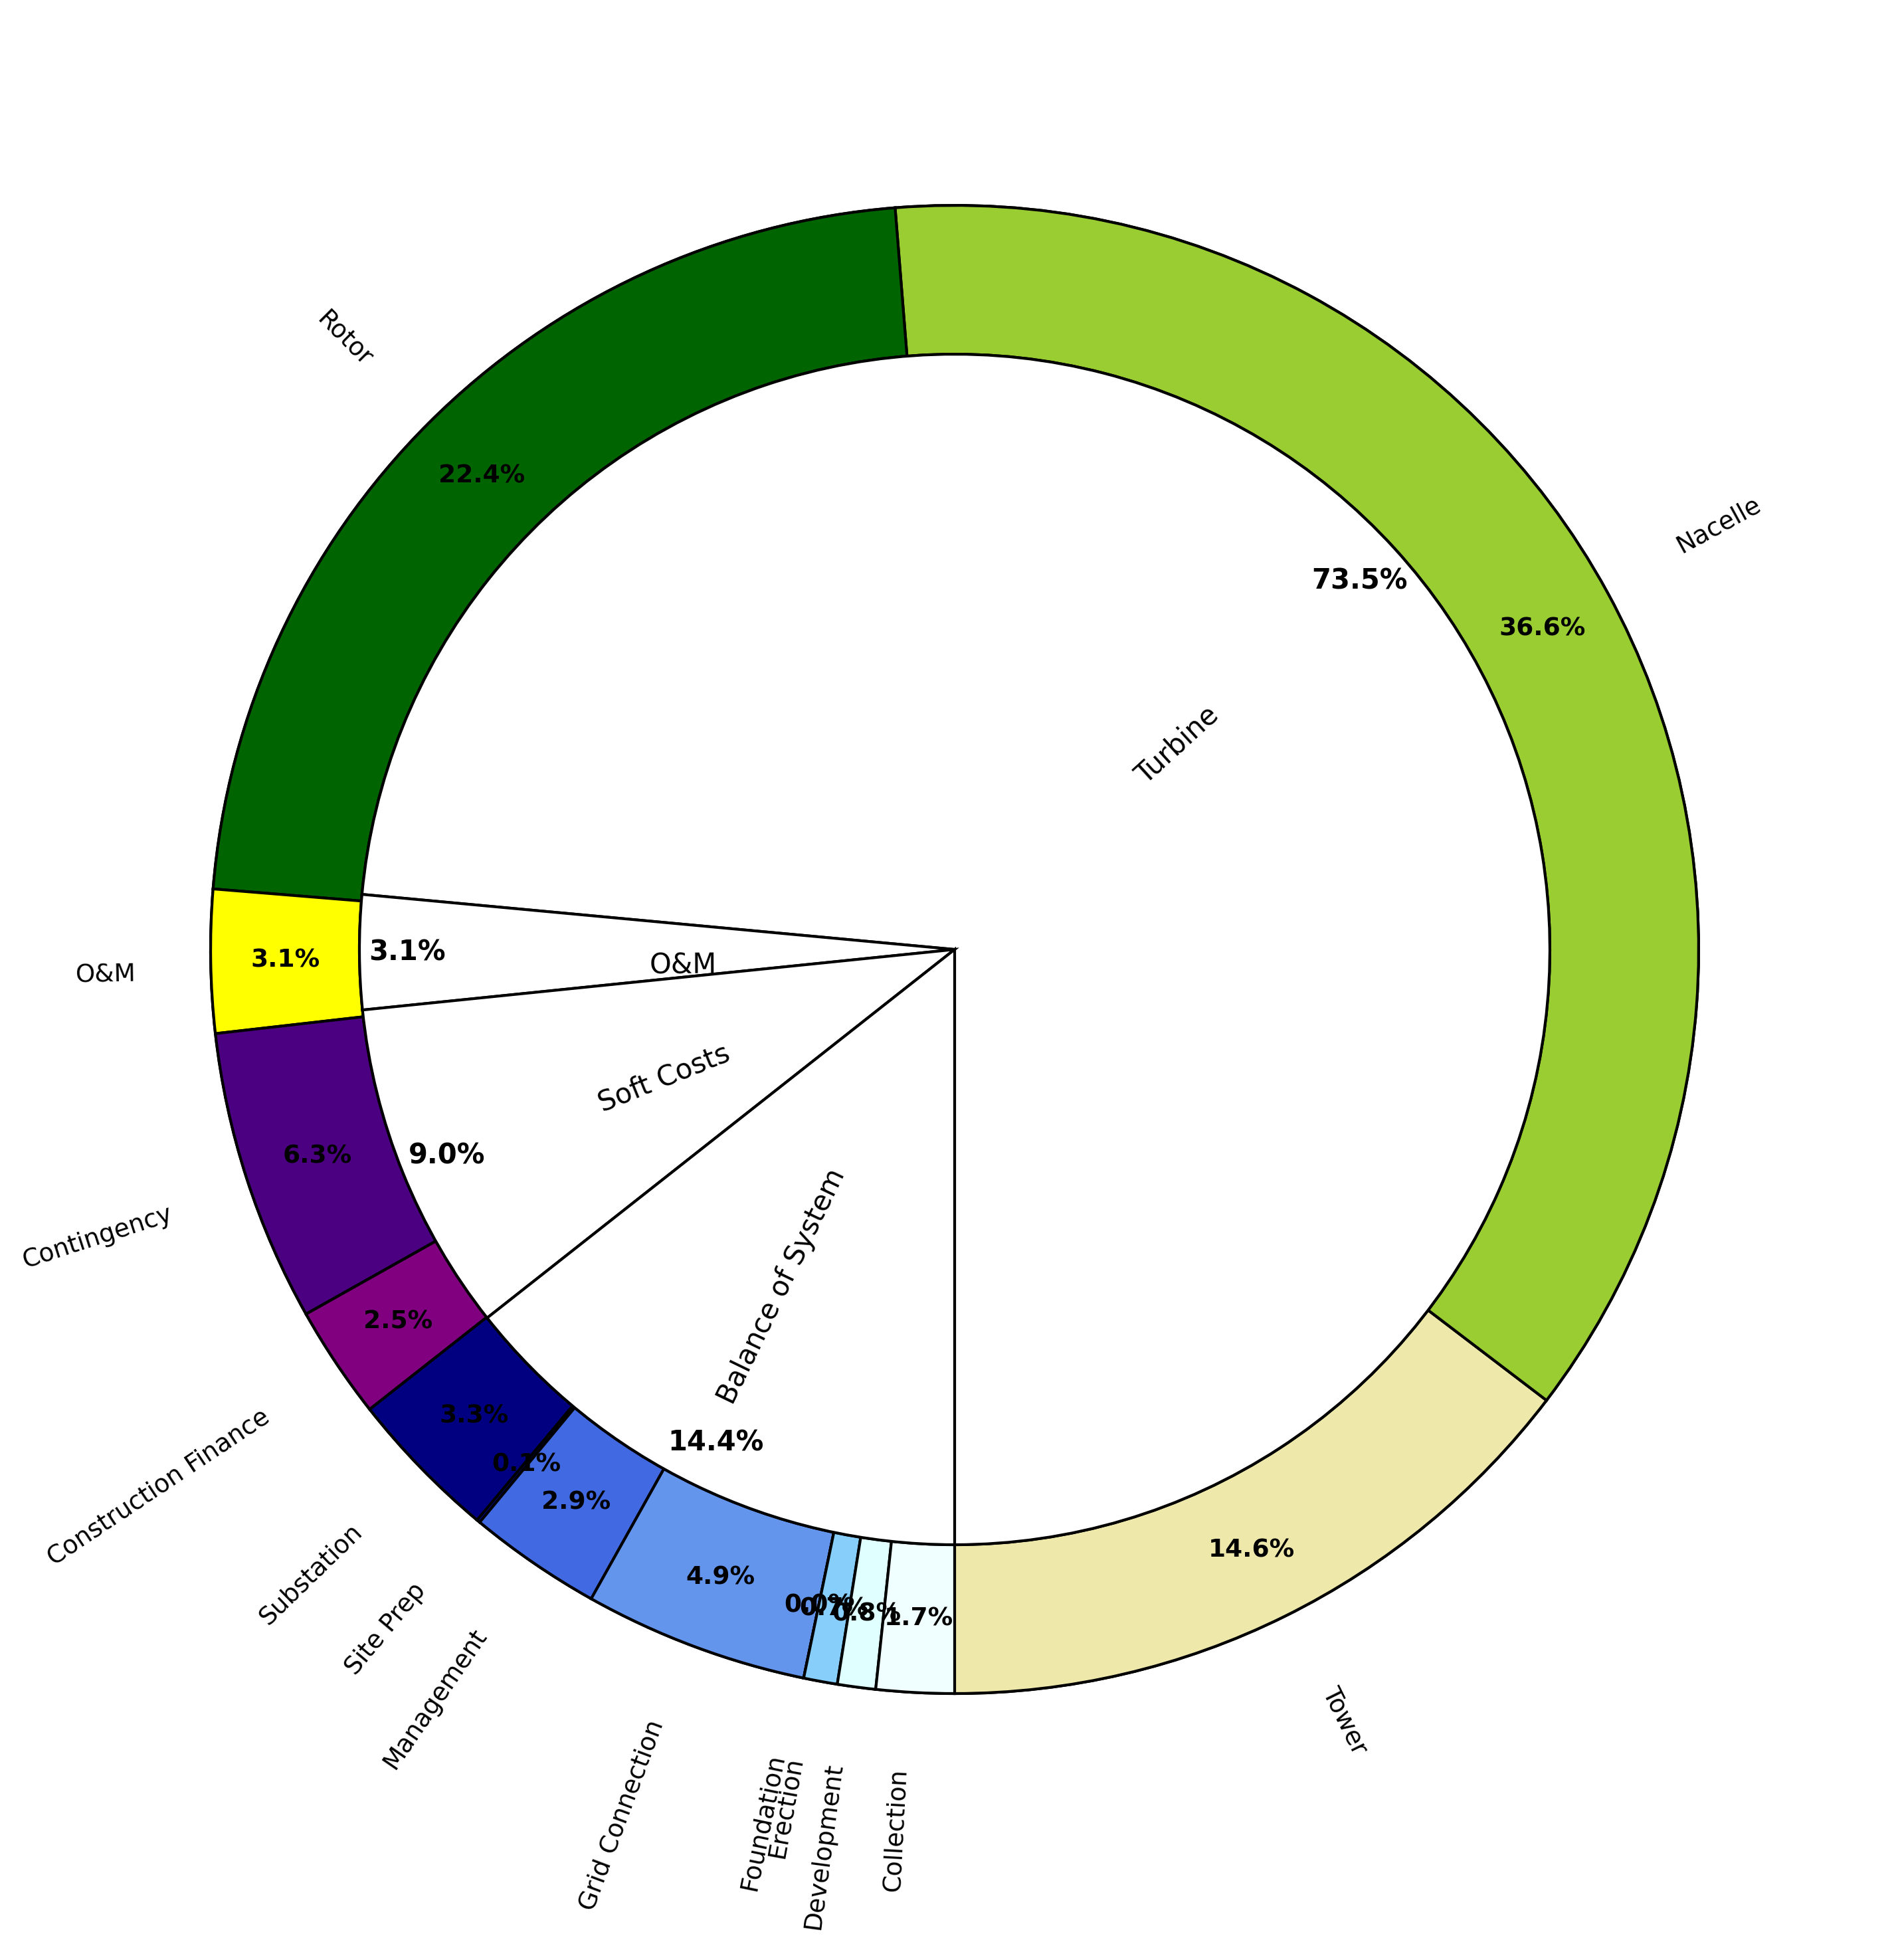

In [23]:
total_collection_cost_kW = total_collection_cost / plant_capacity_kW
total_development_cost_kW = total_development_cost / plant_capacity_kW
total_erection_cost_kW = total_erection_cost / plant_capacity_kW
total_foundation_cost_kW = total_foundation_cost / plant_capacity_kW
total_gridconnection_cost_kW = total_gridconnection_cost / plant_capacity_kW
total_management_cost_kW = total_management_cost / plant_capacity_kW
total_sitepreparation_cost_kW = total_sitepreparation_cost / plant_capacity_kW
total_substation_cost_kW = total_substation_cost / plant_capacity_kW

# Plot
start_angle = -90
plt.figure(figsize=(10,10))
names = ['Tower',                  # darkgreen
         'Nacelle',                # forestgreen
         'Rotor',                  # lightgreen
         
         'O&M',
         
         'Contingency',            # 
         'Construction Finance',   # 
         
         'Substation',
         'Site Prep',
         'Management',
         'Grid Connection',
         'Foundation',
         'Erection',
         'Development',
         'Collection']              #

sub_colors = ['palegoldenrod',
              'yellowgreen', 
              'darkgreen',
              
              'yellow',
              
              'indigo', 
              'purple', 
              
              'navy',
              'mediumblue',
              'royalblue', 
              'cornflowerblue',
              'lightsteelblue', 
              'lightskyblue', 
              'lightcyan',
              'azure']

size = [tower_module, 
        nacelle_module, 
        rotor_cost, 
        
        opex_usd_kw_yr,
        
        contingency_fund, 
        construction_financing_cost, 
        
        total_collection_cost_kW,
        total_development_cost_kW,
        total_erection_cost_kW,
        total_foundation_cost_kW,
        total_gridconnection_cost_kW, 
        total_management_cost_kW,
        total_sitepreparation_cost_kW,
        total_substation_cost_kW]

# Plot

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)

# Internal Pies
sub_names = ['Turbine', 'O&M', 'Soft Costs', 'Balance of System']

a = 'white'
sub_size = [turbine_capex_kW, opex_usd_kw_yr, financial_costs_kW, total_bos_cost_kW]

plt.pie(size, 
        labels = names, 
        startangle=start_angle,
        colors = sub_colors,
        rotatelabels=True,
        radius= 1.0, 
        labeldistance=1.1,
        textprops ={'fontsize':9, 'color': "black"},
        wedgeprops = {'linewidth' : 1, 'edgecolor' : "black" }) 

no_color = 'w'
plt.pie(size, 
#         labels = names, 
        startangle=start_angle,
        autopct = '%1.1f%%', 
        rotatelabels=True,
        pctdistance = 0.9,
#         colors = [no_color],
        colors = sub_colors,
        radius= 1.0, 
#         labeldistance=1.1,
        textprops={'fontweight': 'bold', 
                   'fontsize':9, 
                   'color': "black"},
        wedgeprops = {'linewidth' : 1, 'edgecolor' : "black" }) 



# Internal Pies
plt.pie(sub_size,
        autopct = '%1.1f%%', 
        pctdistance = 0.92,
        rotatelabels=True,
        startangle=start_angle, 
        radius= 0.80, 
        textprops ={
            'fontweight': 'bold' ,
            'fontsize':10, 
            'color': "black"}, 
        wedgeprops = {'linewidth' : 1, 'edgecolor' : "black" } )

plt.pie(sub_size,
        startangle=start_angle, 
        labeldistance =0.40, 
        labels = sub_names,
        rotatelabels=True,
        radius= 0.80, 
        colors=[a, a, a],
        # Labeling for internal pie chart (Turbine, BOS, Financial)
        textprops ={'fontsize':10, 'color': "black"}, 
        wedgeprops = {'linewidth' : 1, 'edgecolor' : "black" } )



# show it
# plt.update_traces()
# plt.legend()
plt.tight_layout()
plt.savefig(path + 'fig_es1.eps', format='eps', dpi=1000)
plt.show()


<br/><br/>
# <center>Table ES1. Summary of the Land-Based Reference Project Using 2.8-megawatt (MW) Wind Turbines

In [24]:
import pandas as pd

column_names = pd.DataFrame([["2.8-MW Land-Based Wind Turbine", "($/kilowatt [kW])"], 
                             ["8.0-MW Offshore Wind Turbine", "($/kilowatt [kW])"], 
                             ["8.0-MW Floating Offshore Wind Turbine", "($/kilowatt [kW])"], 
                             ["20-kW Residential Wind Turbine", "($/kilowatt [kW])"], 
                             ["100-kW Commercial Wind Turbine", "($/kilowatt [kW])"]], 
                             columns=["", ""])
na = "Pending" 
rows = [[turbine_capex_kW, na, na, na, na],
        [round(total_bos_cost_kW), na, na, na, na],
        [financial_costs_kW, na, na, na, na],
        ["", "", "", "", ""],        
        [opex_usd_kw_yr, na, na, na, na],         
        [fcr, na, na, na, na],
        [net_aep, na, na, na, na],        
        [net_cf, na, na, na, na],         
        [lcoe, na, na, na, na]]

columns = pd.MultiIndex.from_frame(column_names)
index = ["Turbine Capital Cost (CapEx)",
         "Balance of System (BOS CapEx)",
         "Financial Cost (Financial CapEx)",
         "  ",
         "OpEx ($/kW/yr)",
         "FCR (real) [%]",
         "Net Annual Energy Production (MWh/MW/yr)",
         "Net Capacity Factor (%)",
         "LCOE ($/MWh)"
        ]

df = pd.DataFrame(rows, columns=columns, index=index)

# def highlight_max(x):
#     return ['font-weight: bold' if v == x.loc[4] else ''
#                 for v in x]

# df.style.apply(highlight_max)

# display(df)
df.style


,2.8-MW Land-Based Wind Turbine,8.0-MW Offshore Wind Turbine,8.0-MW Floating Offshore Wind Turbine,20-kW Residential Wind Turbine,100-kW Commercial Wind Turbine
,($/kilowatt [kW]),($/kilowatt [kW]),($/kilowatt [kW]),($/kilowatt [kW]),($/kilowatt [kW])
Turbine Capital Cost (CapEx),1021,Pending,Pending,Pending,Pending
Balance of System (BOS CapEx),200,Pending,Pending,Pending,Pending
Financial Cost (Financial CapEx),125,Pending,Pending,Pending,Pending
,,,,,
OpEx ($/kW/yr),43,Pending,Pending,Pending,Pending
FCR (real) [%],5.780000,Pending,Pending,Pending,Pending
Net Annual Energy Production (MWh/MW/yr),3703,Pending,Pending,Pending,Pending
Net Capacity Factor (%),42.300000,Pending,Pending,Pending,Pending
LCOE ($/MWh),34,Pending,Pending,Pending,Pending


<br/><br/>
# <center>Figure ES5. Land-based wind power plant assumptions and ranges for key LCOE input parameters.

In [25]:
# Tornado chart template obtained from 
# https://python.plainenglish.io/how-to-create-a-beautify-tornado-chart-in-python-plotly-6c0519e185b4

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

y_labels = ['Project Design Life (years)',
         'Discount Rate (nominal) [%]',
         'Net Capacity Factor (%)',
         'OpEx ($/kW/yr)',
         'CapEx ($/kW)']


upper_capex = 42
upper_opex = 40
upper_net_cf = 60
upper_discount_rate = 37
upper_project_design_life = 45
upper_bound = [upper_project_design_life, 
               upper_discount_rate, 
               upper_net_cf,
               upper_opex,
               upper_capex]

# Values to go into bar labels
upper_capex_label = 2000
upper_opex_label = 60
upper_net_cf_label = 24
upper_discount_rate_label = 6.26
upper_project_design_life_label = 15
upper_bound_label = [upper_project_design_life_label, 
                    upper_discount_rate_label, 
                    upper_net_cf_label,
                    upper_opex_label,
                    upper_capex_label]

# ajdust for lcoe 
upper_bound_lcoe_adjustment = [x - lcoe for x in upper_bound]

lower_capex = lcoe - 26
lower_opex = lcoe - 31
lower_net_cf = lcoe - 25
lower_discount_rate = lcoe - 33
lower_project_design_life = lcoe - 30
lower_bound = [lower_project_design_life, 
               lower_discount_rate, 
               lower_net_cf,
               lower_opex,
               lower_capex]

# Values to go into bar labels
lower_capex_label = 1000
lower_opex_label = 30
lower_net_cf_label = 56
lower_discount_rate_label = 4.22
lower_project_design_life_label = 35
lower_bound_label = [lower_project_design_life_label, 
                    lower_discount_rate_label, 
                    lower_net_cf_label,
                    lower_opex_label,
                    lower_capex_label]

# Values for reference case
base_capex = 0.001
base_opex = 0.001
base_net_cf = 0.001
base_discount_rate = 0.001
base_project_design_life = 0.001
base_bound = [base_project_design_life, 
               base_discount_rate, 
               base_net_cf,
               base_opex,
               base_capex]

# Values to go into bar labels (reference)
base_capex_label = 1462
base_opex_label = 43
base_net_cf_label = 42.3
base_discount_rate_label = 5.23
base_project_design_life_label = 25
base_bound_label = [base_project_design_life_label, 
                    base_discount_rate_label, 
                    base_net_cf_label,
                    base_opex_label,
                    base_capex_label]

#convert lower_bound to negative values
def Convert(lst):
    return [ -i for i in lst ]

negative_lower_bound = Convert(lower_bound)
# ajdust for lcoe 
negative_lower_bound_lcoe_adjustment = [x + lcoe for x in negative_lower_bound]

fig = go.Figure()



customscale=["rgb(51,153,255)",
            "rgb(102, 166, 30)",
            "rgb(230, 131, 16)", 
            "rgb(153, 153, 153)",
            "rgb(51, 34, 136)"]
z = customscale

fig.add_trace(go.Bar(y=y_labels, x=upper_bound_lcoe_adjustment,
                base=lcoe,
                marker=dict(color = z, colorscale=customscale),
                orientation='h',
                marker_line_width=1.5,
                text = [round(elem, 1) for elem in upper_bound_label],
                textposition='auto',
                textfont=dict(color="white")
                    ))

fig.add_trace(go.Bar(y=y_labels, x=base_bound,
                base= lcoe,
                marker=dict(color = z, colorscale=customscale),
                orientation='h',
                text = [round(elem, 1) for elem in base_bound_label],
                textposition='auto',
                textfont=dict(color="white")
              ))

fig.add_trace(go.Bar(y=y_labels, x=negative_lower_bound,
                base= lcoe,
                marker=dict(color = z, colorscale=customscale),
                orientation='h',
                text = [round(elem, 1) for elem in lower_bound_label],
                textposition='inside',
                textfont=dict(color="white")
              ))

fig.update_layout(height=500,
                  margin=dict(t=50,l=10,b=10,r=10),title_text="Land-based wind power plant assumptions and ranges for key LCOE input parameters",
                  title_font_family="sans-serif",
                  title_font_size = 25,
                  title_font_color="black",
                  title_x=0.5 #to adjust the position along x-axis of the title
                 )

fig.update_layout(
                  barmode='overlay', 
                  xaxis_tickangle=-45, 
                  xaxis=dict(
                      title="Leveleized Cost of Electricity [Reference LCOE = $" + str(lcoe) +  "/MWh]"),
                  yaxis=dict(
                             title='Key Parameters for LCOE Sensitivity Analysis', 
                             titlefont_size=16, 
                             tickfont_size=14),
                  bargap=0.30, 
                  paper_bgcolor='white',
                  plot_bgcolor='white',
                 )
fig.update(layout_showlegend=False)
fig.write_image(path + 'fig_es5.eps', scale=1, width=1000, height=800)
fig.show()

<br/><br/>
# <center>Equation 1. LCOE Equation

$$
LCOE = \frac{CapEx * FCR) + OpEx}{AEP_{net}/1000}
$$

<br/><br/>
# <center>Table 5. Reference Land-Based Wind Turbine Parameters

In [26]:
import plotly.graph_objects as go

headerColor = '#048ee0'
rowEvenColor = 'white'
rowOddColor = '#d4efff'

fig = go.Figure(data=[go.Table(
  columnorder=[1, 2],
  columnwidth = [2,1],
  header=dict(
    values=['<b>Turbine Parameters</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['center','center'],
    font=dict(color='white', size=22),
    height= 40, 
    line=dict(color='paleturquoise', width=2)
  ),
  cells=dict(
    values=[
      # Column 1
      ["Turbine rated power (MW)",
         "Turbine rotor diameter (m)",
         "Turbine hub height (m) ",
         "Maximum rotor tip speed (meters per second [m/s])",
         "Tip-speed ratio at maximum coefficient of power (Cp) ",
         "Drivetrain design",
         "Cut-in wind speed (m/s)",
         "Cut-out wind speed (m/s)",
         "Maximum coefficient of power"],
      # Column 2
      [2.8, 125, 90, 80, 8, 'Geared', 3, 25, 0.47]
    ],
    height = 35,
      
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 20), 
    line=dict(color='paleturquoise', width=2)
    ))
])

fig.update_layout(font_family='arial')

fig.show()

<br/><br/>
# <center>Figure 6. Pathway to LCOE reduction in 2030 by LCOE parameter

In [27]:
# # Sample waterfall obtained from https://www.machinelearningplus.com/waterfall-plot-in-python/
# import pandas as pd
# import numpy as np
# import waterfall_chart
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams.update({'figure.figsize':(7.5,5), 'figure.dpi':100})

# a = ['FY 2016 GPRA','CapEx','AEP','OpEx','Financing']
# b = [56,-8,-20,-4,-1]
# waterfall_chart.plot(a, b);

import plotly.graph_objects as go

initial_target = 56
capex_target = -8
aep_target = -20
opex_target = -4
financing_target = -1
final_target = initial_target + capex_target + aep_target + opex_target + financing_target

fig = go.Figure(go.Waterfall(
    name = "20", 
    orientation = "v",
    measure = ["relative", "relative", "relative", "relative", "relative", "total"],
    x = ['FY 2016 GPRA','CapEx','AEP','OpEx','Financing', "FY 2030 Target"],
    textposition = "outside",
    text = [initial_target, capex_target, aep_target, opex_target, financing_target, final_target],
    y = [+56,-8,-20,-4,-1, final_target],
#     connector = {"line":{"color":"rgb(63, 63, 63)"}},
))


fig.update_layout(
        title = "Pathway to LCOE reduction in 2030 by LCOE parameter",
        showlegend = False,
        paper_bgcolor='white',
        plot_bgcolor='white',
        yaxis=dict(
            title='LCOE (2015 $/MWh)',
            titlefont_size=16,
            tickfont_size=14),
)
# fig.update(layout_showlegend=False)
fig.write_image(path + 'fig_6.eps', scale=1, width=1000, height=800)
fig.show()


<br/><br/>
# <center> Figure 7. Land-based-wind GPRA cost trajectories for LCOE (in 2015 USD)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


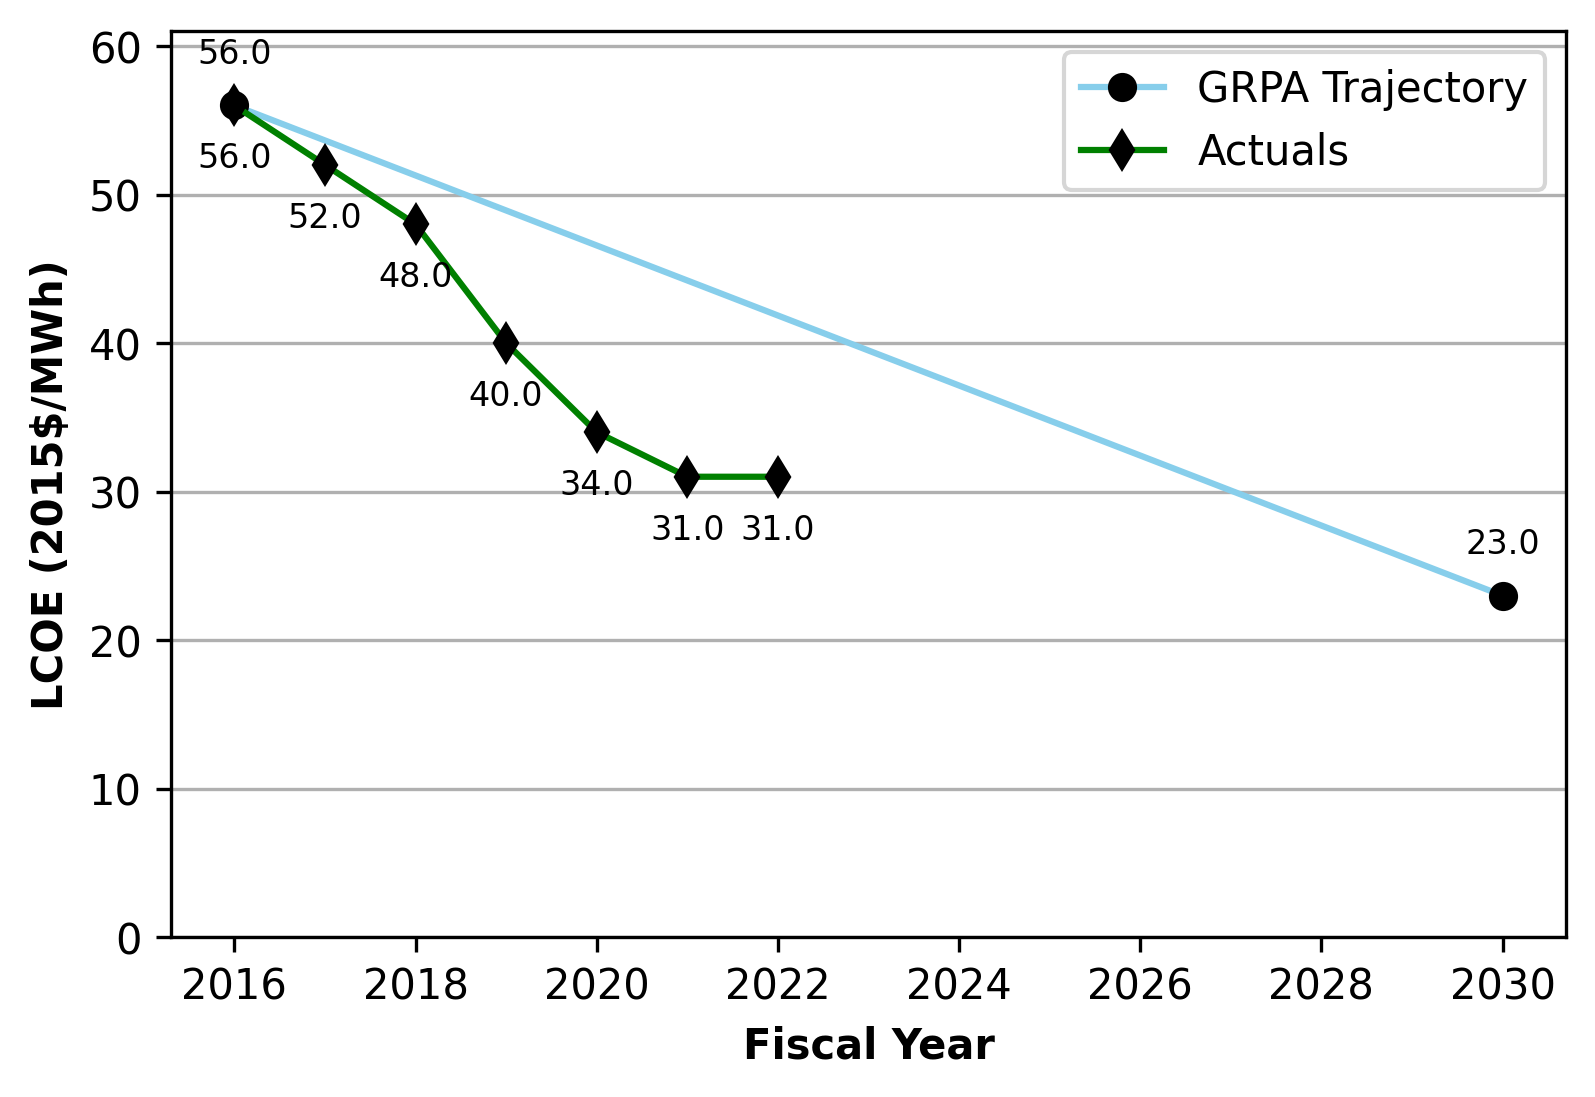

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

gpra_y = [56, 23]
gpra_x = [2016, 2030]

actuals_y = [56, 52, 48, 40, 34, 31, 31]
actuals_x = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

plt.plot(gpra_x, gpra_y, 
         linestyle='-', 
         marker='o', 
         color='skyblue', 
         markerfacecolor='black', 
         markeredgecolor='black', 
         label='GRPA Trajectory')

plt.plot(actuals_x, 
         actuals_y, 
         linestyle='-', 
         marker='d', 
         markerfacecolor='black', 
         markeredgecolor='black', 
         color='green', 
         label='Actuals')

max_y = [*gpra_y, *actuals_y]

plt.xlabel('Fiscal Year', fontweight='bold')
plt.ylabel('LCOE (2015$/MWh)', fontweight='bold')

for index in range(len(actuals_x)):
  label = "{:.1f}".format(actuals_y[index])
  plt.annotate(label, 
                 (actuals_x[index],actuals_y[index]), 
                 textcoords="offset points", 
                 xytext=(0,-15), 
                 ha='center', 
                 size=8) 

for index in range(len(gpra_x)):
  label = "{:.1f}".format(gpra_y[index])
  plt.annotate(label, 
                 (gpra_x[index],gpra_y[index]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 size=8) 
plt.legend()
plt.grid(axis='y')
plt.ylim([0, (max(max_y) + 5)])
plt.savefig(path + 'fig_7.eps', format='eps', dpi=1000)
plt.show()

In [29]:
# create a table summary - https://stackoverflow.com/questions/71487443/python-formatting-dataframe-table-colours-and-borders

# print(index)
data = [['Turbine rated power (MW)', 2.8], 
        ['Turbine rotor diameter (m)', 125], 
        ['Turbine hub height (m)', 90],
        ['Maximum rotor tip speed (meters per second [m/s])', 80],
        ['Tip-speed ratio at maximum coefficient of power (Cp)', 8],
       ['Drivetrain design', 'Geared'],
       ['Cut-in wind speed (m/s)', 3],
       ['Cut-out wind speed (m/s) ', 25],
       ['Maximum coefficient of power', 0.47]]

table = pd.DataFrame(data = data, 
#                       index = index,
                      columns =  pd.MultiIndex.from_product([['Turbine Parameters'], ['', ' ']]))

# set styles
header = {'selector': 'th', 'props': 
          [('background-color', '#00008b'), ('color', 'white'), ('text-align', 'center'), ('vertical-align', 'centre'), ('font-weight', 'bold')]}

header_level0 = {'selector': 'th.col_heading.level0', 'props': [('font-size', '15px')]}

index = {'selector': 'th.row_heading', 'props': 
         [('background-color', '#5b9bd5'), ('color', 'white'), ('text-align', 'center'), ('font-weight', 'bold')]}

top_row = {'selector': 'td.data.row0', 'props': 
         [('background-color', '#5b9bd5'), ('color', 'white'), ('text-align', 'center'), ('font-weight', 'bold')]}

borders_bottom1 = {'selector': '.row0', 'props': 
                  [('border-bottom', '1px solid #00008b'), ('border-top', '1px solid #00008b')]}

borders_bottom2 = {'selector': '.row_heading.level0.row1', 'props': 
                  [('border-bottom', '1px solid #00008b')]}

headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}

# table = table.style.set_caption("Some Caption").set_table_styles(styles)

table

Turbine Parameters        
                                                            
0                           Turbine rated power (MW)     2.8
1                         Turbine rotor diameter (m)     125
2                             Turbine hub height (m)      90
3  Maximum rotor tip speed (meters per second [m/s])      80
4  Tip-speed ratio at maximum coefficient of powe...       8
5                                  Drivetrain design  Geared
6                            Cut-in wind speed (m/s)       3
7                          Cut-out wind speed (m/s)       25
8                       Maximum coefficient of power    0.47